In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def drawSP(c):
    plt.rcParams['figure.figsize'] = [10, 10]
    fig, ax = plt.subplots()
    ax.plot()
    
    def dimensions(c): # l,h
        if c=='Z':
            return [1,1,None]
        else: 
            ds = [dimensions(t) for t in c[1:]]
            ls = [d[0] for d in ds]
            hs = [d[1] for d in ds]
            if c[0]=='S':   
                return [sum(ls)+len(c),max(hs)+2,  ds]
            elif c[0]=='P':
                return [max(ls)+2, sum(hs)+len(c), ds]
            else:
                raise "impossible..."
            
    def draw(d,x,y,o):
        if d==[1, 1, None]:
            ax.add_patch(Rectangle((x,y),1,1,fill=False))
            return
        ax.add_patch(Rectangle((x,y),d[0],d[1],fill=False))
        if o=='P':
            ny = y+1
            for i in range(len(d[2])-1,-1,-1):
                li,hi,di = d[2][i]
                draw(d[2][i],x+1,ny,'S')
                ny+=hi+1
        if o=='S':
            nx = x+1
            for i in range(len(d[2])-1,-1,-1):
                li,hi,di = d[2][i]
                draw(d[2][i],nx,y+1,'P')
                nx+=li+1
    
    d = dimensions(c)
    draw(d,1,1,c[0])
    
    plt.axis('equal')
    plt.axis('off')
    plt.show()

In [2]:
from random import *
import math

def draw(k_init, init, next, lbd):
    U = random()
    p = init
    S = init
    k = k_init
    while U > S:
        p = next(p, lbd, k)
        S += p
        k += 1
    return k

""" Bernoulli Law """
def bern(lbd):
    return random() < lbd


""" Geometric Law """
def next_geom(p, lbd, k):
    return lbd * p

def geom(lbd):
    return draw(0, (1 - lbd), next_geom, lbd)

def fast_geom(lbd):
    U = random()
    return (int)(math.floor(math.log(U) / math.log(lbd)))


""" Poisson Law """
def next_poiss(p, lbd, k):
    return lbd * p / (k + 1)

def poiss(lbd):
    return draw(0, math.exp(-lbd), next_poiss, lbd)

def non_zero_poiss(lbd):
    return draw(1, lbd / (math.exp(lbd) - 1), next_poiss, lbd)


""" Logarithmic Law """
def next_loga(p, lbd, k):
    return lbd * p * (k) / (k + 1)

def loga(lbd):
    return draw(1, -lbd / math.log(1 - lbd), next_loga, lbd)

In [3]:
# {SP = Union(S,P), S = Sequence(Union(Z,P),card>=2), P = Set(Union(Z,S),card>=2)}
P,S,SP = dict(),dict(),dict()
x = 0.2451438475598137
xValues = [x]
P[x] = 0.1368221595124981
S[x] = 0.2360679707399782
SP[x] = 0.3728901302524763

x = 0.2451438475
xValues.append(x)
P[x] = 0.1368220951
S[x] = 0.2360678666
SP[x] = 0.3728899617

x = 0.245143
xValues.append(x)
P[x] = 0.1362846333
S[x] = 0.2351980904
SP[x] = 0.3714827236

x = 0.2451
xValues.append(x)
P[x] = 0.1329816377
S[x] = 0.2298464452
SP[x] = 0.3628280829

x = 0.2
xValues.append(x)
P[x] = 0.04232734905 
S[x] = 0.07750384553
SP[x] = 0.1198311946

In [4]:
print(xValues,P,S,SP)

[0.2451438475598137, 0.2451438475, 0.245143, 0.2451, 0.2] {0.2451438475598137: 0.1368221595124981, 0.2451438475: 0.1368220951, 0.245143: 0.1362846333, 0.2451: 0.1329816377, 0.2: 0.04232734905} {0.2451438475598137: 0.2360679707399782, 0.2451438475: 0.2360678666, 0.245143: 0.2351980904, 0.2451: 0.2298464452, 0.2: 0.07750384553} {0.2451438475598137: 0.3728901302524763, 0.2451438475: 0.3728899617, 0.245143: 0.3714827236, 0.2451: 0.3628280829, 0.2: 0.1198311946}


In [5]:
def genSP(x,maxi):
    size = 0
    def sizeUP():
        nonlocal size,maxi # compteur global
        size += 1
        if size > maxi:
            raise Exception("Too large")   
    def genUS():
        u = random()
        if u < x/(x + P[x]):
            sizeUP()
            return 'Z'
        else: return genP()
    def genUP():
        u = random()
        if u < x/(x + S[x]):
            sizeUP()
            return 'Z'
        else: return genS()
    def genS():
        k = fast_geom(x + P[x])+2
        return ['S'] + [genUS() for i in range(k)]
    def genP():
        k = poiss(x + S[x])
        while(k < 2):
            k = poiss(x + S[x])
        return ['P'] + [genUP() for i in range(k)]
    try:
        u = random()
        if u < P[x]/(SP[x]):
            return genP(), size
        else : return genS(), size
    except Exception as err:
        #print(err)
        return None, 0 
        

In [6]:
c,size = genSP(xValues[4],1000)
print(c,size)

['S', 'Z', ['P', 'Z', 'Z']] 3


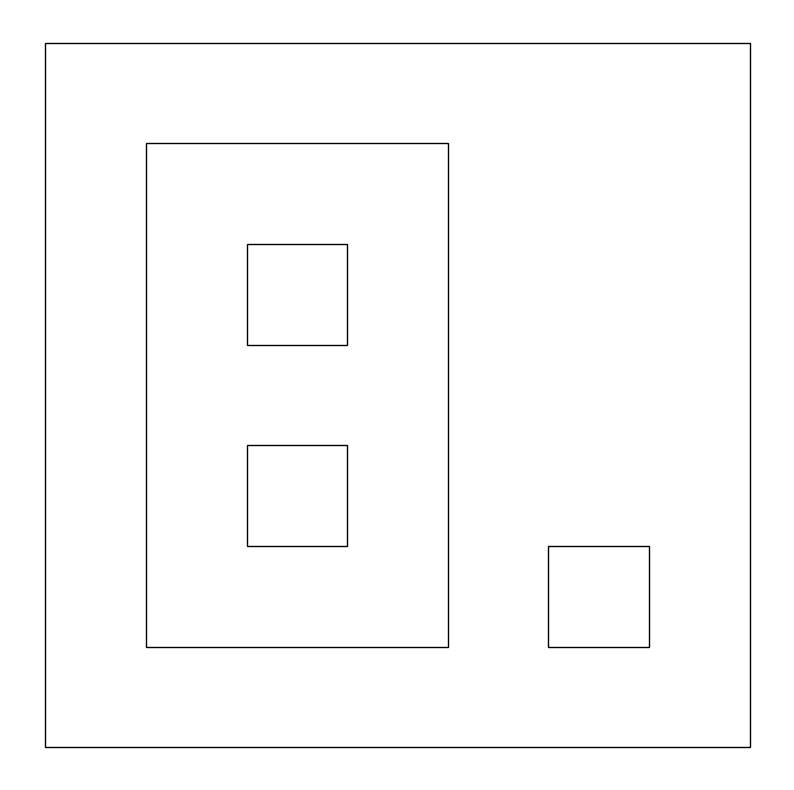

In [7]:
drawSP(c)

In [8]:
def genSP_fixe(x,n):
    nb_trials, size_trials = 0, 0
    while True :
        t,s = genSP(x,n)
        nb_trials += 1
        size_trials += s
        if s == n:
            return nb_trials, size_trials, t
        
def genSP_approx(x,mini, maxi):
    nb_trials, size_trials = 0, 0
    while True :
        t,s = genSP(x,maxi)
        nb_trials += 1
        size_trials += s
        if mini <= s <= maxi:
            return nb_trials, size_trials, t, s

In [9]:
nb_trials,size_trials,circuit,size = genSP_approx(xValues[3],200,300)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}\n".format(nb_trials,size_trials,size))
print(circuit)

nombre d'essais = 300, taille du rejet = 4901, taille du circuit = 246

['S', ['P', ['S', 'Z', ['P', 'Z', ['S', 'Z', ['P', ['S', ['P', 'Z', 'Z', 'Z'], ['P', ['S', ['P', ['S', ['P', ['S', ['P', 'Z', ['S', 'Z', ['P', 'Z', ['S', 'Z', 'Z']]], 'Z', ['S', 'Z', 'Z']], ['P', 'Z', 'Z', ['S', 'Z', ['P', ['S', ['P', 'Z', ['S', 'Z', ['P', 'Z', ['S', 'Z', ['P', 'Z', 'Z'], 'Z']], 'Z']], 'Z', 'Z', 'Z'], ['S', ['P', 'Z', ['S', ['P', 'Z', ['S', 'Z', 'Z']], 'Z', ['P', 'Z', 'Z']]], ['P', ['S', ['P', ['S', 'Z', 'Z'], 'Z', ['S', 'Z', 'Z', 'Z']], 'Z'], ['S', ['P', ['S', 'Z', 'Z'], 'Z'], 'Z'], 'Z']]], 'Z', ['P', ['S', 'Z', 'Z'], ['S', 'Z', ['P', 'Z', ['S', ['P', 'Z', ['S', 'Z', 'Z', 'Z']], 'Z']], ['P', ['S', 'Z', 'Z'], ['S', 'Z', 'Z']], 'Z', 'Z'], 'Z'], 'Z']]], ['S', ['P', 'Z', ['S', ['P', 'Z', 'Z'], ['P', 'Z', 'Z'], ['P', 'Z', 'Z'], 'Z', 'Z'], 'Z'], 'Z']], ['P', 'Z', ['S', ['P', 'Z', 'Z'], 'Z', 'Z']]], ['S', 'Z', 'Z']], 'Z'], 'Z']], ['S', ['P', ['S', 'Z', 'Z'], ['S', 'Z', ['P', 'Z', 'Z'], ['P', ['S', ['P', 

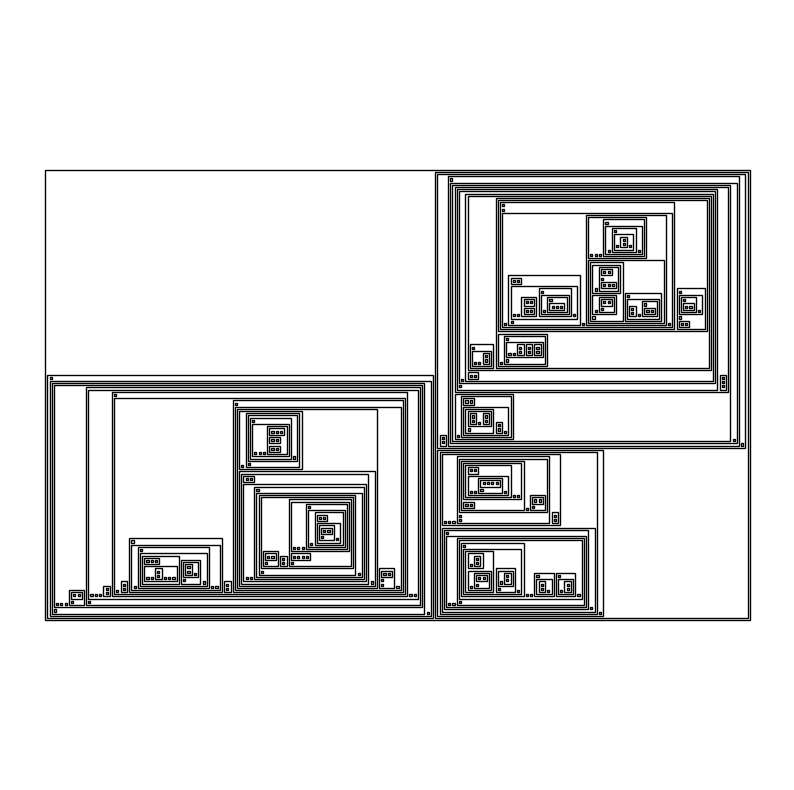

In [10]:
drawSP(circuit)

In [11]:
import sys
sys.setrecursionlimit(100000)
nb_trials,size_trials,circuit,size = genSP_approx(xValues[2],10_000,100_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))

nombre d'essais = 564, taille du rejet = 160850, taille du circuit = 84401


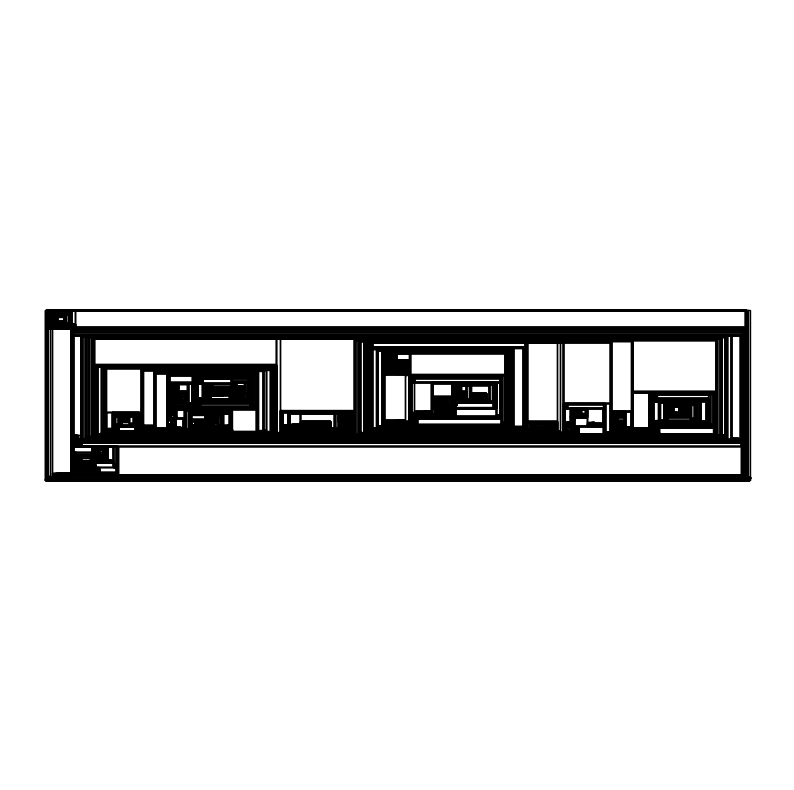

In [12]:
drawSP(circuit)

In [13]:
nb_trials,size_trials,circuit,size = genSP_approx(xValues[2],100_000,1_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))

nombre d'essais = 634, taille du rejet = 263628, taille du circuit = 170860


In [14]:
nb_trials,size_trials,circuit,size = genSP_approx(xValues[1],500_000,1_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))

nombre d'essais = 484, taille du rejet = 1060463, taille du circuit = 885561


In [15]:
nb_trials,size_trials,circuit,size = genSP_approx(xValues[0],1_000_000,2_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))

nombre d'essais = 3174, taille du rejet = 5032612, taille du circuit = 1281916


--- vérification du générateur ---

In [16]:
def count_occurences(gen, nb):
    dico = {}
    for i in range(nb):
        tmp = str(gen())
        if tmp in dico:
            dico[tmp] += 1
        else:
             dico[tmp] = 1
    print("nb:", len(dico))
    for key in dico:
        print(key, "{0:.2f}".format(dico[key] / nb * 100))

In [17]:
count_occurences(lambda : genSP_fixe(xValues[3],3)[2],1000000)
print(100./19) 
# 19 circuits 
# ['S', ['P', 'Z', 'Z'], 'Z'] x3
# ['P', ['S', 'Z', 'Z'], 'Z'] = ['P', 'Z', ['S', 'Z', 'Z']] x6
# ['S', 'Z', ['P', 'Z', 'Z']] x3
# ['S', 'Z', 'Z', 'Z'] x6
# ['P', 'Z', 'Z', 'Z'] x1

nb: 6
['P', 'Z', 'Z', 'Z'] 5.28
['S', ['P', 'Z', 'Z'], 'Z'] 15.78
['S', 'Z', 'Z', 'Z'] 31.56
['P', 'Z', ['S', 'Z', 'Z']] 15.85
['P', ['S', 'Z', 'Z'], 'Z'] 15.77
['S', 'Z', ['P', 'Z', 'Z']] 15.77
5.2631578947368425


In [18]:
def counts_max_and_average(gen,nb):
    counts = []
    discard = 0
    for i in range(nb):
        size = gen()
        if size > 0:
            counts.append(size)
        else:
            discard +=1
    return discard, counts, max(counts), sum(counts)/nb

n = 10_000
d, l, m, a = counts_max_and_average(lambda : genSP(xValues[3],1000)[1], n)
print("trop grands = {}, taille max = {}, moyenne des tailles = {}".format(d,m,a))

trop grands = 186, taille max = 998, moyenne des tailles = 33.428


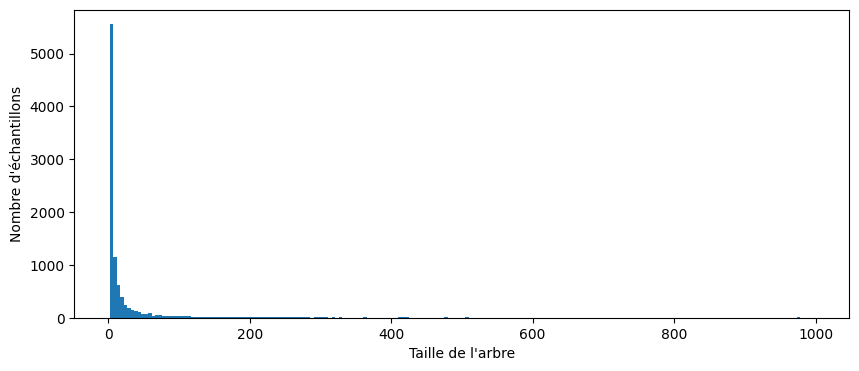

<Figure size 1000x400 with 0 Axes>

In [19]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
plt.show()